In [183]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

### Mean, Median and Mode

* The mean (average) of a data set is found by adding all numbers in the data set and then dividing by the number of values in the set. 
* The median is the middle value when a data set is ordered from least to greatest. 
* The mode is the number that occurs most often in a data set.

In [184]:
# import data from the data sources.
folder_path = "assignment-datasets/"
df = pd.read_csv(folder_path + "Stock_File_1.csv")
df2 = pd.read_csv(folder_path + "Stock_File_2.txt")

In [185]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1-Jun-06,471.60,474.00,442.0,444.42,21900
1,12-Jun-06,454.00,464.00,440.0,446.17,8400
2,22-Jun-06,451.16,464.20,447.6,460.26,19400
3,3-Jul-06,495.10,509.68,493.0,498.97,9100
4,13-Jul-06,518.00,526.40,517.0,521.66,6800


In [186]:
df2.head()

,Date,Open,High,Low,Close,Volume
0,3-Jan-11,798.0,824.95,796.00,810.55,17600
1,13-Jan-11,748.1,768.00,NaN,752.85,13000
2,24-Jan-11,741.0,626.01,732.55,NaN,8700
3,1-Feb-11,753.0,753.00,712.10,717.25,23700
4,11-Feb-11,647.9,654.55,626.35,642.40,12800


In [187]:
# check for null values in both the data frames.
null_count_1 = df.isnull().sum()
null_count_2 = df2.isnull().sum()
print(
    f"""
    {null_count_1}
    {null_count_2}
    """
)


    Date      0
Open      4
High      7
Low       6
Close     7
Volume    0
dtype: int64
    Date      0
Open      3
High      9
Low       7
Close     7
Volume    0
dtype: int64
    


In [188]:
# Check for duplicate col values in both the data frames.
duplicate_count_1 = df.duplicated(subset="Close").sum()
duplicate_count_2 = df2.duplicated(subset="Close").sum()
print(
    f"""
    {duplicate_count_1}
    {duplicate_count_2}
    """
)



    7
    6
    


In [189]:
# concat the two data frames.
df_concat = pd.concat([df, df2], axis=0)
df_concat.head()

# export the concatenated data frame to a csv file.
df_concat.to_csv(folder_path + "Stock_File_concat.csv", index=False)

In [190]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 203
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    369 non-null    object 
 1   Open    362 non-null    float64
 2   High    353 non-null    float64
 3   Low     356 non-null    float64
 4   Close   355 non-null    float64
 5   Volume  369 non-null    object 
dtypes: float64(4), object(2)
memory usage: 20.2+ KB


In [191]:
# Fill the null values in the high Column with the mean of the High Column.
df_concat["High"].fillna(df_concat["High"].mean(), inplace=True)
df_concat["Low"].fillna(df_concat["Low"].mean(), inplace=True)
df_concat["Close"].fillna(df_concat["Close"].mean(), inplace=True)
df_concat["Open"].fillna(df_concat["Open"].mean(), inplace=True)
df_concat.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [192]:
# find the rows in Volume column where the value is "zero"
df_concat['Volume'].replace('zero', 0, inplace=True)
df_concat[df_concat["Volume"] == "zero"]
# df_concat.to_csv(folder_path + "Stock_File_concat.csv", index=False)
# convert Volume to a int64 data type.
df_concat["Volume"] = df_concat["Volume"].astype(float)
# df_concat.info()

<AxesSubplot:title={'center':'Stock Price'}, xlabel='Date'>

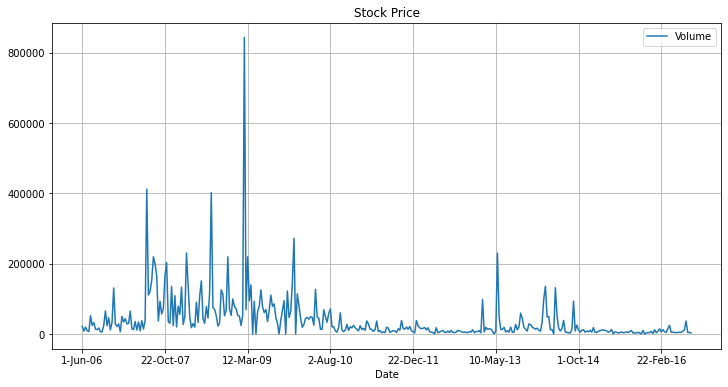

In [193]:
# visualize the data using matplotlib.
df_concat.plot(
    x="Date",
    y="Volume",
    style="-",
    figsize=(12, 6),
    title="Stock Price",
    grid=True,
)

In [194]:
df_concat.describe()

,Open,High,Low,Close,Volume
count,369.000000,369.000000,369.000000,369.000000,369.000000
mean,890.291768,858.892918,856.357472,867.098817,39097.831978
std,295.137342,269.740766,264.635147,266.283773,67323.679903
min,364.000000,366.000000,354.000000,363.600000,0.000000
25%,703.000000,685.000000,683.000000,692.550000,6800.000000
50%,818.850000,814.000000,805.000000,818.000000,16400.000000
75%,1102.500000,1057.900000,1050.000000,1072.500000,47100.000000
max,2291.950000,1650.000000,1600.050000,1607.850000,843600.000000


In [205]:
# find the values that are greater than the mean of the volume column.
# df_concat[df_concat["Volume"] > df_concat["Volume"].mean()]
len(df_concat['Volume'].unique())


267